In [1]:
!pip install spacy
!pip install scattertext

     |████████████████████████████████| 7.3 MB 4.8 MB/s 
     |████████████████████████████████| 24.1 MB 2.3 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=2b5af550caa1ee1e19283b7706b964faf054320aecbfd9169f05b14a80e59aff
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
!pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/vi_core_news_lg/dist/vi_core_news_lg-0.0.1.tar.gz
!pip install pyvi

     |████████████████████████████████| 254.5 MB 30 kB/s 
     |████████████████████████████████| 5.8 MB 4.4 MB/s 
     |████████████████████████████████| 10.1 MB 35.3 MB/s 
     |████████████████████████████████| 653 kB 37.5 MB/s 
     |████████████████████████████████| 451 kB 46.3 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Created wheel for vi-core-news-lg: filename=vi_core_news_lg-0.0.1-py3-none-any.whl size=254513618 sha256=3fb5f1996c001a0f42fbb51ebcbc85301a92582692dc11fcde7f3ce193ebf96d
  Stored in directory: /root/.cache/pip/wheels/e4/d9/90/dcbb25186a2c3335b17bc675f8dddcb43ecdfa4b400e8c91b0
Successfully built vi-core-news-lg
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thin

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/My Drive/LDS0_K273_ONLINE_DoThiPhuong/Topic_3/'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS0_K273_ONLINE_DoThiPhuong/Topic_3


In [4]:
import pandas as pd
import spacy
import scattertext as st
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
data = pd.read_csv('foody_08032022pre.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22296 entries, 0 to 22295
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant     22296 non-null  object 
 1   review_text    22296 non-null  object 
 2   review_score   22296 non-null  float64
 3   review_text_1  22296 non-null  object 
 4   label          22296 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 871.1+ KB


In [6]:
len(data.restaurant.unique())

566

Dữ liệu gồm 22296 đánh giá cho 566 nhà hàng.

In [7]:
data['label'] = data.review_score.apply(lambda x: 'dislike' if x < 6.5 else 'like')

In [8]:
data.head()

,restaurant,review_text,review_score,review_text_1,label
0,Chả Cá Hà Nội Xưa,"Nhà hàng mới đổi địa chỉ sang 24 Hồng Hà, khá ...",8.8,đổi địa_chỉ khá uống cực khá ổn chuẩn laịii,like
1,Chả Cá Hà Nội Xưa,Quán đã chuyển về 22 Hồng Hà cới phong cách kh...,3.2,cới đổi tệ nhất ngâm tím không mùi_vị đắt nâng...,dislike
2,Chả Cá Hà Nội Xưa,"Giá niêm yết trên foody một kiểu, giá lúc ship...",3.2,niêm_yết shipper kêu bực_mình không tiếc đặt_h...,dislike
3,Chả Cá Hà Nội Xưa,Xem review thấy mọi người khen chả cá lã vọng ...,7.0,review chả_cá vọng vọng ăn_giá_cả đợi không kh...,like
4,Chả Cá Hà Nội Xưa,Tối nay mới đi ăn quán này món chả cá lã vọng ...,9.2,vọng đậu khá không đắt khá ân_cần vọng kêu thử...,like


In [9]:
nlp = spacy.load('vi_core_news_lg')

In [10]:
corpus = st.CorpusFromPandas(data, category_col = 'label',
                             text_col = 'review_text',
                             nlp = nlp).build()

In [11]:
sent = st.produce_scattertext_explorer(corpus,
                                       category = 'dislike',
                                       category_name = 'Dislike',
                                       not_categories = ['like'],
                                       not_category_name = 'Like',
                                       width_in_pixels = 1000,
                                       metadata = data['review_text'])

In [12]:
open('Foody_Sentiment.html', 'wb').write(sent.encode('utf-8'))

37165525

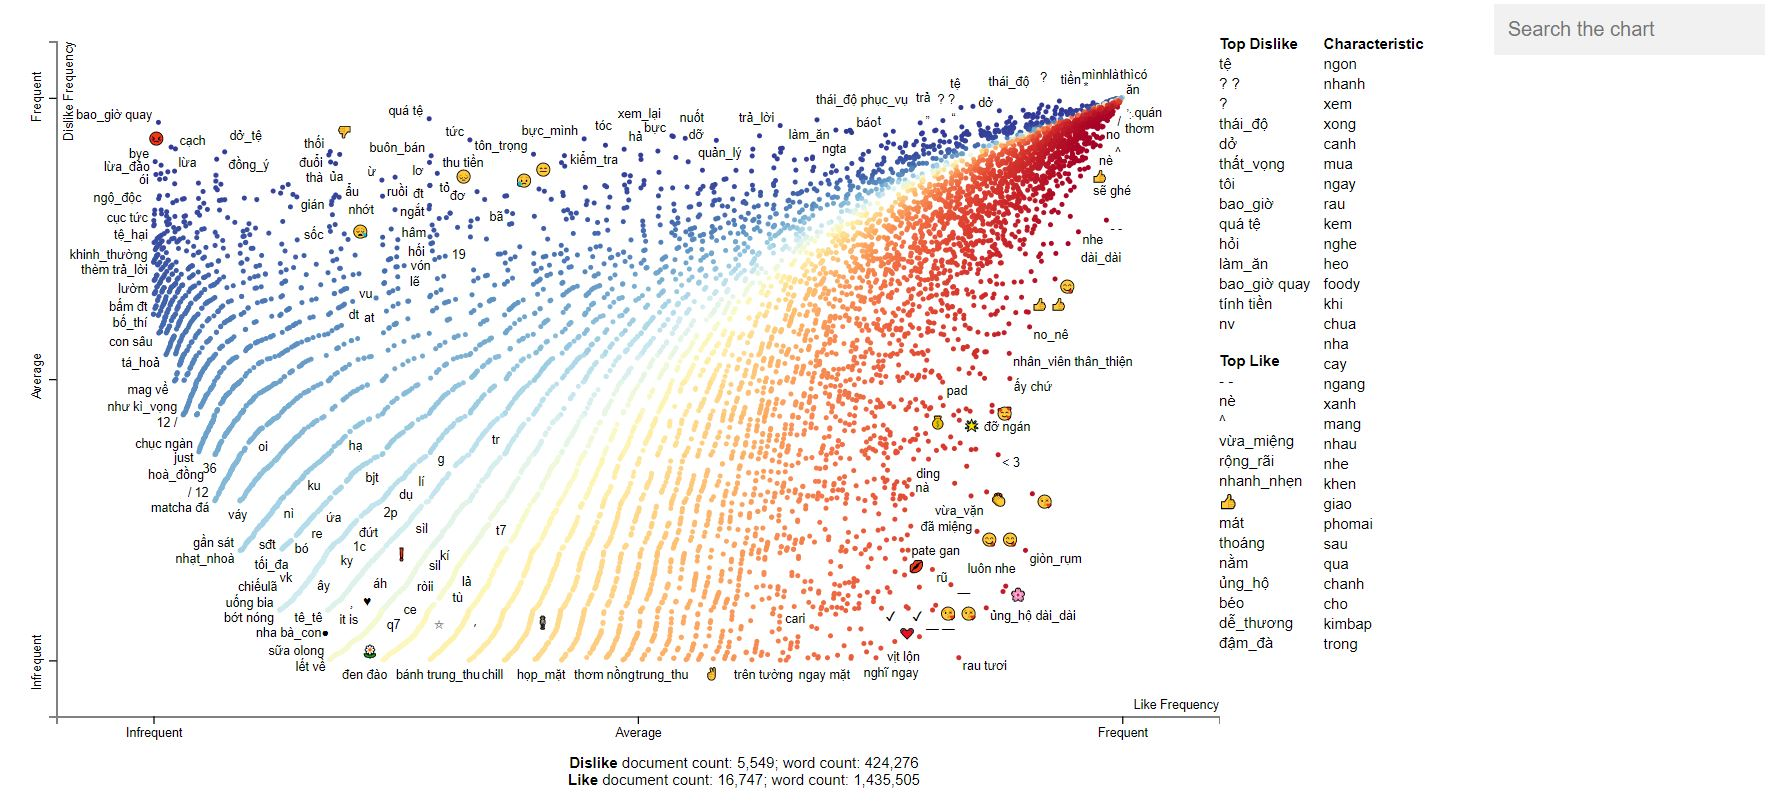